In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned/cleaned_data.csv')

Mean of TradeValue: 181161.76987179488


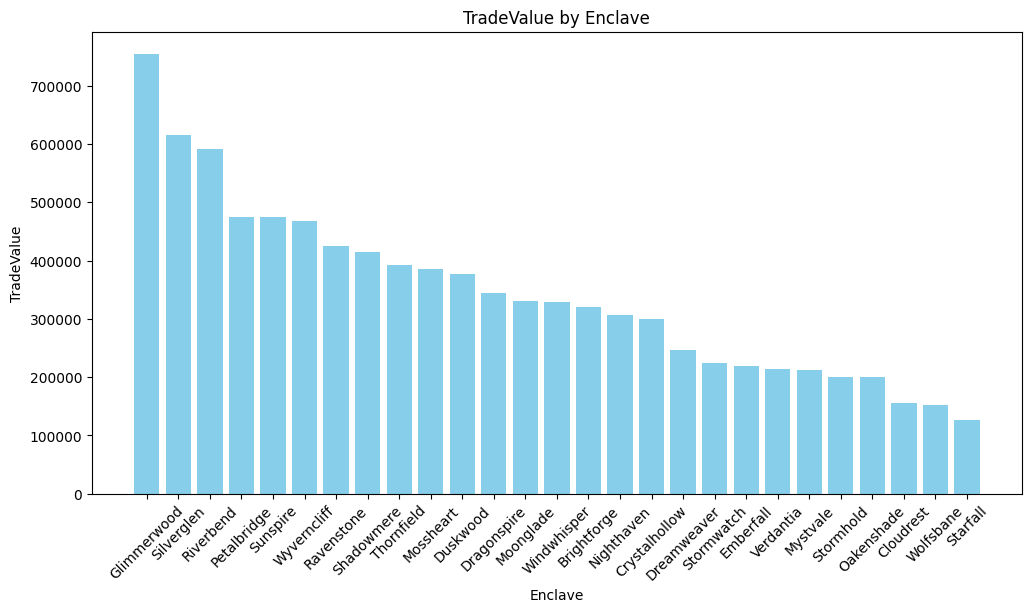

In [31]:
# Calculate the mean of the 'TradeValue' column
trade_value_mean = df['TradeValue'].mean()
print(f"Mean of TradeValue: {trade_value_mean}")

# Sort the 'TradeValue' column
sorted_trade_values = df.sort_values(by='TradeValue', ascending=False)

x = sorted_trade_values['Enclave']
y = sorted_trade_values['TradeValue']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Enclave')
plt.ylabel('TradeValue')
plt.title('TradeValue by Enclave')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Step 1: Calculate the 25th percentile of TradeValue
threshold_25 = np.percentile(df['TradeValue'], 25)

# Step 2: Determine median TradeValue per enclave
enclave_medians = df.groupby('Enclave')['TradeValue'].median()

# Step 3: Define enclave categories
high_cost_enclaves = enclave_medians[enclave_medians > threshold_25 * 1.5].index 
mixed_enclaves = enclave_medians[(enclave_medians <= threshold_25 * 1.5) & (enclave_medians > threshold_25)].index

# Step 4: Apply affordability classification
def classify_affordability(row):
    if row['TradeValue'] <= threshold_25:
        return 1  # Affordable
    elif row['Enclave'] in high_cost_enclaves:
        return 0  # Always unaffordable
    elif row['Enclave'] in mixed_enclaves:
        return 1 if row['TradeValue'] <= enclave_medians[row['Enclave']] else 0
    else:
        return 0

# Apply classification
df['AffordableDwelling'] = df.apply(classify_affordability, axis=1)

# Check results
df[['Enclave', 'TradeValue', 'AffordableDwelling']].head()

,Enclave,TradeValue,AffordableDwelling
0,Brightforge,269500.0,0
1,Brightforge,184900.0,0
2,Petalbridge,87000.0,1
3,Shadowmere,130000.0,0
4,Dragonspire,144000.0,0


<Figure size 1500x600 with 0 Axes>

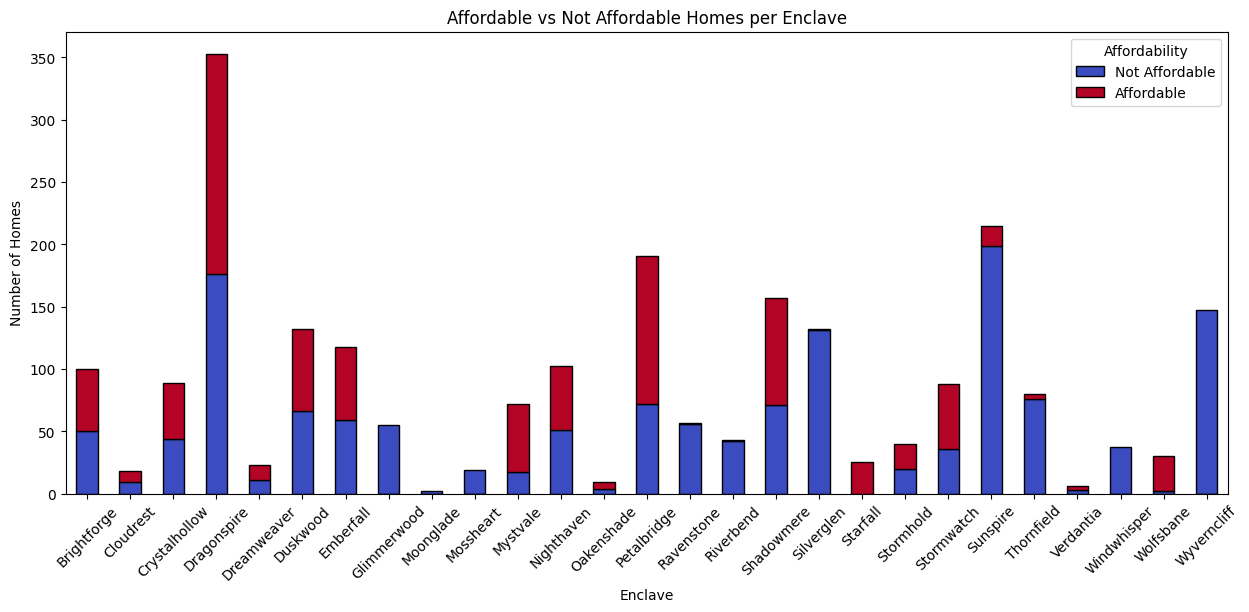

In [33]:

# Step 1: Count affordable and non-affordable homes per enclave
affordability_counts = df.groupby(['Enclave', 'AffordableDwelling']).size().unstack().fillna(0)

# Rename columns for clarity
affordability_counts.columns = ['Not Affordable', 'Affordable']

# Step 2: Plot affordability distribution per enclave
plt.figure(figsize=(15, 6))
affordability_counts.plot(kind='bar', stacked=True, figsize=(15,6), colormap='coolwarm', edgecolor='black')
plt.xlabel("Enclave")
plt.ylabel("Number of Homes")
plt.title("Affordable vs Not Affordable Homes per Enclave")
plt.xticks(rotation=45)
plt.legend(title="Affordability")
plt.show()
